# GFS Data Download

In [1]:
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Grab GFS Data

In [2]:
#Open the dataset
ds = xr.open_dataset('https://rda.ucar.edu/thredds/dodsC/files/g/ds084.1/2019/20190903/gfs.0p25.2019090312.f030.grib2')
ds

<xarray.Dataset>
Dimensions:                                                                   (
                                                                               lat: 721,
                                                                               lon: 1440,
                                                                               time: 2,
                                                                               time_bounds_1: 2,
                                                                               time1: 1,
                                                                               ...
                                                                               isobaric6: 24,
                                                                               pressure_difference_layer2: 2,
                                                                               pressure_difference_layer2_bounds_1: 2,
                                                                               isobaric7: 19,
                                                                               depth_below_surface_layer: 4,
                                                                               depth_below_surface_layer_bounds_1: 2)
Coordinates: (12/30)
  * lat                                                                       (lat) float32 ...
  * lon                                                                       (lon) float32 ...
    reftime                                                                   datetime64[ns] ...
  * time                                                                      (time) datetime64[ns] ...
  * time1                                                                     (time1) datetime64[ns] ...
  * time2                                                                     (time2) datetime64[ns] ...
    ...                                                                        ...
  * potential_vorticity_surface                                               (potential_vorticity_surface) float32 ...
  * height_above_ground4                                                      (height_above_ground4) float32 ...
  * isobaric6                                                                 (isobaric6) float32 ...
  * pressure_difference_layer2                                                (pressure_difference_layer2) float32 ...
  * isobaric7                                                                 (isobaric7) float32 ...
  * depth_below_surface_layer                                                 (depth_below_surface_layer) float32 ...
Dimensions without coordinates: time_bounds_1, time1_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/165)
    LatLon_Projection                                                         int32 ...
    time_bounds                                                               (time, time_bounds_1) datetime64[ns] ...
    time1_bounds                                                              (time1, time1_bounds_1) datetime64[ns] ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ..

### Subset Data

In [3]:
ds_sel = ds.sel(lat=slice(35,19), lon=slice(270, 300))

In [4]:
#Subset data
lat = ds_sel.lat.values
lon = ds_sel.lon.values
pre = ds_sel.Pressure_surface.values[0, :,:] / 100
land = ds_sel.Land_cover_0__sea_1__land_surface[0, :, :]

#Elimanate land data
sea_pre = pre - (land * pre)
press = sea_pre.where(sea_pre >= 1, drop=True)

#Find the min point
min_lat, min_lon = np.where(press == np.min(press))

In [5]:
ds_sel

<xarray.Dataset>
Dimensions:                                                                   (
                                                                               lat: 65,
                                                                               lon: 121,
                                                                               time: 2,
                                                                               time_bounds_1: 2,
                                                                               time1: 1,
                                                                               ...
                                                                               isobaric6: 24,
                                                                               pressure_difference_layer2: 2,
                                                                               pressure_difference_layer2_bounds_1: 2,
                                                                               isobaric7: 19,
                                                                               depth_below_surface_layer: 4,
                                                                               depth_below_surface_layer_bounds_1: 2)
Coordinates: (12/30)
  * lat                                                                       (lat) float32 ...
  * lon                                                                       (lon) float32 ...
    reftime                                                                   datetime64[ns] ...
  * time                                                                      (time) datetime64[ns] ...
  * time1                                                                     (time1) datetime64[ns] ...
  * time2                                                                     (time2) datetime64[ns] ...
    ...                                                                        ...
  * potential_vorticity_surface                                               (potential_vorticity_surface) float32 ...
  * height_above_ground4                                                      (height_above_ground4) float32 ...
  * isobaric6                                                                 (isobaric6) float32 ...
  * pressure_difference_layer2                                                (pressure_difference_layer2) float32 ...
  * isobaric7                                                                 (isobaric7) float32 ...
  * depth_below_surface_layer                                                 (depth_below_surface_layer) float32 ...
Dimensions without coordinates: time_bounds_1, time1_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/165)
    LatLon_Projection                                                         int32 ...
    time_bounds                                                               (time, time_bounds_1) datetime64[ns] ...
    time1_bounds                                                              (time1, time1_bounds_1) datetime64[ns] ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ...


### Plot the Data!

 The lat is 30.25, the lon is 79.75, the pres is 959.1531982421875


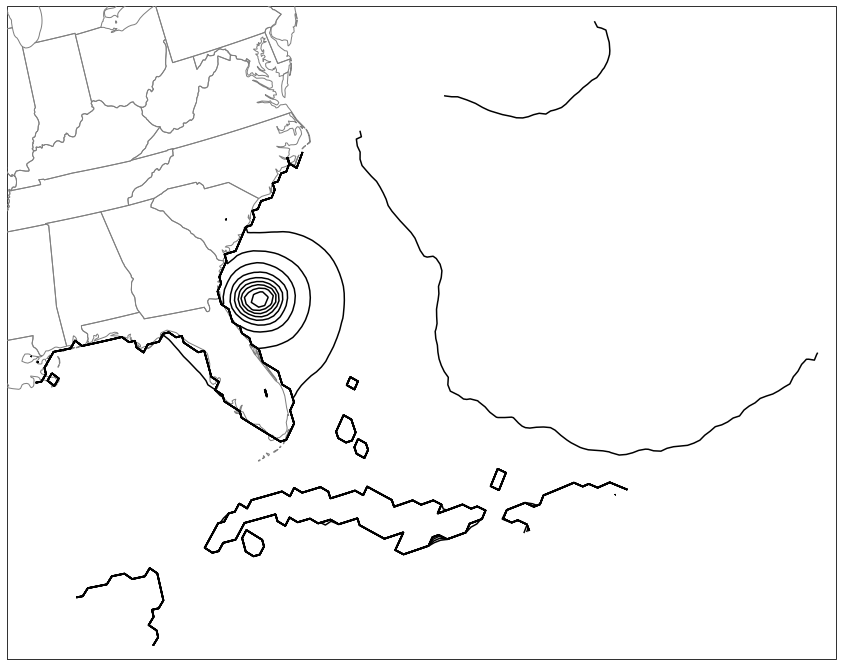

In [6]:
#Create figure
fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 50., central_longitude = -107.))

#Add data and geographic areas
ax1.add_feature(cartopy.feature.STATES, facecolor='none', edgecolor='grey', zorder = 9)
ax1.contour(lon, lat, sea_pre, transform = cartopy.crs.PlateCarree(), levels = np.arange(950,1050,6), colors='k', zorder = 10)

#Print the important information
print(f' The lat is {sea_pre.lat.values[min_lat][0]}, the lon is {360 - sea_pre.lon.values[min_lon][0]}, the pres is {np.min(press).values}')